In [1]:
from zget_data import get_responses, get_qdetails, get_questions, page_map, quest_map
from collections import defaultdict
import pandas as pd
import json

In [2]:
survey_response, time_response = get_responses()

## Time Analysis

,index,1,2,3,4,5,6,7,csquest,spasssurvey,demo,total (mins)
0,47.704,8.317,5.774,20.529,3.303,35.736,6.323,62.769,1143.746,75.336,75.957,24.758233
1,63.538,11.205,3.537,25.954,3.870,22.020,7.220,79.719,1088.877,97.159,197.108,26.670117
2,40.725,5.459,4.329,25.462,4.268,33.700,2.059,51.148,897.312,51.163,75.270,19.848250


23.758866666666666

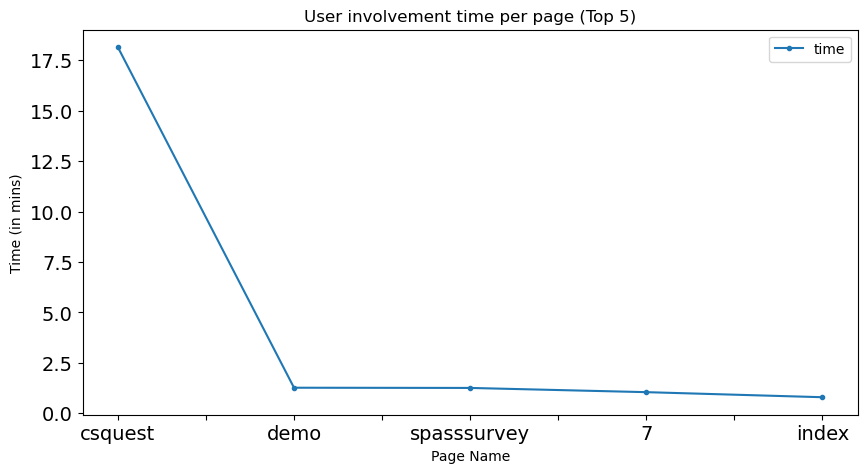

In [3]:
page_time_df = pd.DataFrame(time_response)
page_time_df = page_time_df.sort_index(axis=1, key=lambda x: x.astype(int))
page_time_df = page_time_df.rename(page_map, axis=1)
page_time_df['total (mins)'] = page_time_df.sum(axis=1)/60
display(page_time_df)
display(page_time_df['total (mins)'].mean())


# top 5 pages with higher time
top5 = pd.DataFrame(columns=['page', 'time'])
for i, data in page_time_df.median().div(60).sort_values(ascending=False).head(5).items():
    top5 = pd.concat([top5, pd.DataFrame([[i, data]], columns=top5.columns)])

_ = top5.plot(x='page', y='time', figsize=(10, 5), xlabel="Page Name", ylabel="Time (in mins)", title="User involvement time per page (Top 5)", fontsize=14, style=".-")

## Survey Response Analysis

In [4]:
questions = get_questions()
survey_response_df = pd.DataFrame(survey_response)
display(survey_response_df)

,8,9,0,10
0,"{'Sto': {'12-1': '2', '5-1': '6', '5-2': '5', ...","{'1-1': 'lrndsk!schl', '2-1': 'Strong', '3-1':...","{'1-1': ['Schoolwork', 'Assignments and homewo...","{'1-1': 'Boy', '2-1': '11 years old', '3-1': '..."
1,"{'Sto': {'12-1': '2', '5-1': '6', '5-2': '7', ...","{'1-1': 'JPawesome@8yrs', '2-1': 'Strong', '3-...","{'1-1': ['Assignments and homework', 'Games', ...","{'1-1': 'Boy', '2-1': '11 years old', '3-1': '..."
2,"{'Sto': {'12-1': '1', '5-1': '7', '5-2': '7', ...","{'1-1': 'granddeep4810', '2-1': 'Very Strong',...","{'1-1': ['Games'], '2-1': '3 to 5 hours per day'}","{'1-1': 'Boy', '2-1': '8 years old', '3-1': '3..."


In [5]:
normqsid = ['1-1', '1-2', '1-3', '1-4', '2-1', '3-1', '5-1', '5-2', '5-3', '5-4', '6-1', '7-1', '9-1', '10-1']
dnames = ['Sto', 'Cus', 'Bas']

normcolumns = [f'{qsid}_{dname}' for qsid in normqsid for dname in dnames]

def test(d):
    temp = {}
    for k, v in d.items():
        for k2, v2 in v.items():
            q = f'{k2}_{k}'
            temp[q] = v2
    return temp

csquest_response_df = survey_response_df['8'].apply(test)

In [6]:
csquest_design_df = pd.DataFrame(csquest_response_df.to_dict()).T
csquest_design_df

,12-1_Sto,5-1_Sto,5-2_Sto,5-3_Sto,5-4_Sto,9-1_Sto,10-1_Sto,2-1_Sto,3-1_Sto,6-1_Sto,...,5-2_Bas,5-3_Bas,5-4_Bas,9-1_Bas,10-1_Bas,11-1_Bas,1-3_Bas,1-1_Bas,1-2_Bas,1-4_Bas
0,2,6,5,7,6,5,7,4,5,5,...,5,7,6,5,7,3rd design because it shows how in different s...,4,5,6,7
1,2,6,7,6,6,6,7,6,7,7,...,6,6,6,6,7,The third one is the best in understanding how...,6,4,5,6
2,1,7,7,5,7,7,7,7,4,7,...,7,7,7,7,7,3rd because it shows an example of it \nhappen...,7,4,5,7


In [7]:
csquest_quant_df = csquest_design_df[normcolumns].astype(int)
norm_csquest_quant_df = csquest_quant_df.sub(4)

In [8]:
norm_csquest_quant_df

,1-1_Sto,1-1_Cus,1-1_Bas,1-2_Sto,1-2_Cus,1-2_Bas,1-3_Sto,1-3_Cus,1-3_Bas,1-4_Sto,...,6-1_Bas,7-1_Sto,7-1_Cus,7-1_Bas,9-1_Sto,9-1_Cus,9-1_Bas,10-1_Sto,10-1_Cus,10-1_Bas
0,2,0,1,1,0,2,-1,1,0,3,...,1,3,3,3,1,1,1,3,3,3
1,2,1,0,1,2,1,2,1,2,2,...,1,3,2,2,2,3,2,3,3,3
2,1,2,0,3,3,1,3,-1,3,2,...,3,3,2,3,3,3,3,3,3,3


In [9]:
norm_sto_df = norm_csquest_quant_df.filter(like='Sto')
norm_cus_df = norm_csquest_quant_df.filter(like='Cus')
norm_bas_df = norm_csquest_quant_df.filter(like='Bas')

In [10]:
condition = '1-|5-'
new_norm_sto_df = norm_sto_df.filter(regex=f'^(?!.*{condition}).*$', axis=1)

new_column_names = {old_name: old_name.split('-')[0] for old_name in new_norm_sto_df.columns}
new_norm_sto_df = new_norm_sto_df.rename(columns=new_column_names)

temp = norm_sto_df.filter(like='1-')
new_norm_sto_df['1'] = temp.T.mean()

temp = norm_sto_df.filter(like='5-')
new_norm_sto_df['5'] = temp.T.mean()



# temp = norm_cus_df.filter(like='1-')
# temp.T.mean()

# temp = norm_bas_df.filter(like='1-')
# temp.T.mean()


# temp = norm_cus_df.filter(like='5-')
# temp.T.mean()

# temp = norm_bas_df.filter(like='5-')
# temp.T.mean()

display(new_norm_sto_df)


condition = '1-|5-'
new_norm_cus_df = norm_cus_df.filter(regex=f'^(?!.*{condition}).*$', axis=1)

new_column_names = {old_name: old_name.split('-')[0] for old_name in new_norm_cus_df.columns}
new_norm_cus_df = new_norm_cus_df.rename(columns=new_column_names)

temp = norm_cus_df.filter(like='1-')
new_norm_cus_df['1'] = temp.T.mean()

temp = norm_cus_df.filter(like='5-')
new_norm_cus_df['5'] = temp.T.mean()

display(new_norm_cus_df)


condition = '1-|5-'
new_norm_bas_df = norm_bas_df.filter(regex=f'^(?!.*{condition}).*$', axis=1)

new_column_names = {old_name: old_name.split('-')[0] for old_name in new_norm_bas_df.columns}
new_norm_bas_df = new_norm_bas_df.rename(columns=new_column_names)

temp = norm_bas_df.filter(like='1-')
new_norm_bas_df['1'] = temp.T.mean()

temp = norm_bas_df.filter(like='5-')
new_norm_bas_df['5'] = temp.T.mean()

display(new_norm_bas_df)


,2,3,6,7,9,10,1,5
0,0,1,1,3,1,3,1.25,2.00
1,2,3,3,3,2,3,1.75,2.25
2,3,0,3,3,3,3,2.25,2.50


,2,3,6,7,9,10,1,5
0,1,0,1,3,1,3,0.75,2.00
1,2,2,1,2,3,3,1.50,3.00
2,2,1,3,2,3,3,1.75,2.25


,2,3,6,7,9,10,1,5
0,0,1,1,3,1,3,1.50,2.00
1,2,1,1,2,2,3,1.25,2.25
2,0,3,3,3,3,3,1.75,3.00


In [11]:
display(pd.DataFrame(new_norm_sto_df.mean()).T)
display(pd.DataFrame(new_norm_cus_df.mean()).T)
pd.DataFrame(new_norm_bas_df.mean()).T

,2,3,6,7,9,10,1,5
0,1.666667,1.333333,2.333333,3.0,2.0,3.0,1.75,2.25


,2,3,6,7,9,10,1,5
0,1.666667,1.0,1.666667,2.333333,2.333333,3.0,1.333333,2.416667


,2,3,6,7,9,10,1,5
0,0.666667,1.666667,1.666667,2.666667,2.0,3.0,1.5,2.416667
